# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')  #seaborn 제공하는 toy dataset 을 DataFrame으로 가져오는 함수. (tips: 팁 데이터셋)
# toy dataset: 패키지에 사용할 수있는 연습용 (공개)데이터
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

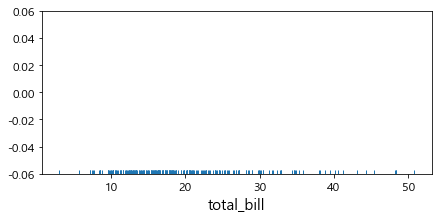

In [3]:
plt.figure(figsize=(7,3))
sns.rugplot(tips['total_bill'])
plt.show()
# histogram과 같이 시각화해서 각 계급(bin, group별 범위)안에서의 값의 분포를 확인할 수있다.

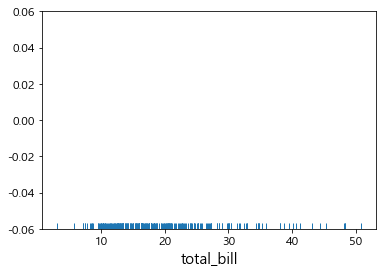

In [4]:
# seaborn은 dataframe과 연동이 matplotlib보다 쉽다.
# 그래프를 그릴때 사용할 값에다 컬럼명을 지정, data=DataFrame을 지정.
sns.rugplot('total_bill', data=tips)
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

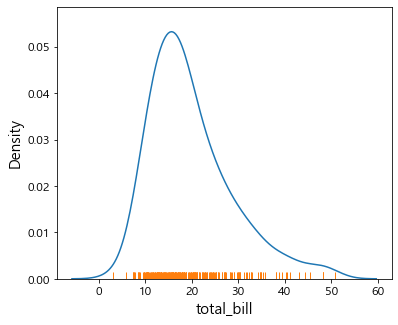

In [5]:
plt.figure(figsize=(6,5))
# sns.kdeplot(tips['total_bill'])
sns.kdeplot('total_bill', data=tips)  #y축: 수량의 비율
sns.rugplot('total_bill', data=tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

E:\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


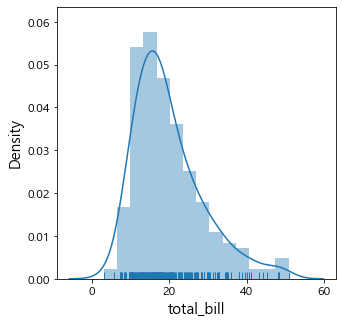

In [10]:
plt.figure(figsize=(5,))
sns.distplot(tips['total_bill'],    #컬럼명, data=DF 형식으로 호출할 수 없다.
             hist=True,        # 히스토그램을 그릴지 여부(True: default)
             kde=True,         # kdeplot을 그릴지 여부(True: default)
             rug=True)        # rugplot을 그릴지 여부(False: deafult)
plt.show()

E:\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


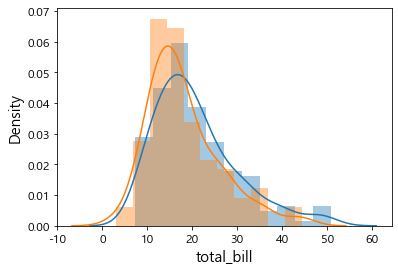

In [12]:
a= tips.loc[tips['sex'] == 'Male', 'total_bill'] # 남성의 total bill
b = tips.loc[tips['sex'] == 'Female', 'total_bill'] # 여성의 total bill
sns.distplot(a)
sns.distplot(b)
plt.show()

### displot

<Figure size 504x504 with 0 Axes>

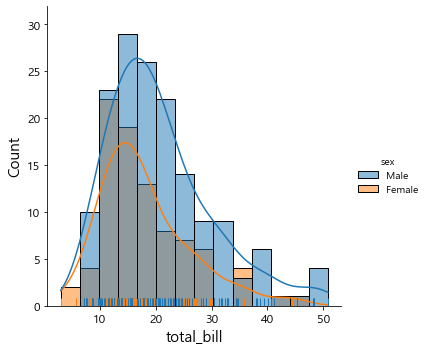

In [13]:
# group별로 나눠서 히스토그램, rugplot, kdeplot 등을 확인
#   displot() - group 별로 나눠서 시각화.  (distplot(): 하나의 컬럼에 대해서만 시각화)
# 남성/여성 별 total_bill 분포를 비교
plt.figure(figsize=(7,7))
sns.displot(x='total_bill', hue='sex', data=tips, 
            kde=True, rug=True)  #kde, rug: default-False
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

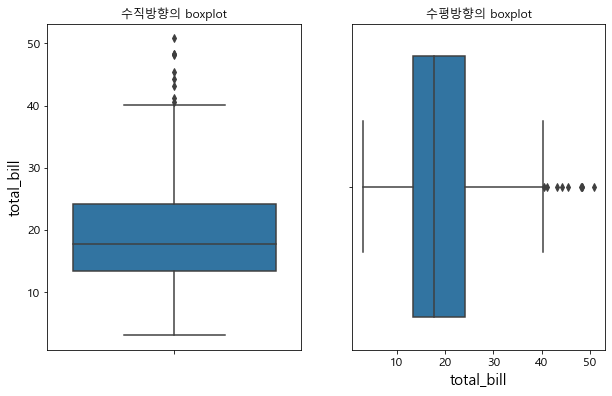

In [16]:
plt.figure(figsize=(10,6))
# 하나의 figure 2개의 axes를 이용해 시각화.
plt.subplot(1,2,1)
# sns.boxplot(y=tips['total_bill'])
sns.boxplot(y='total_bill', data=tips) #data frame과 컬럼명을 분리해 설정.
plt.title("수직방향의 boxplot")

plt.subplot(1,2,2)
sns.boxplot(x=tips['total_bill'])
plt.title("수평방향의 boxplot")
plt.show()

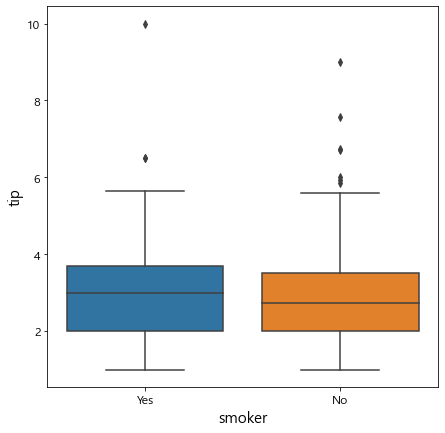

In [17]:
# 흡연여부별 tip의 분포를 boxplot 비교 - 한 axes 시각화
plt.figure(figsize=(7,7))
# 수직
sns.boxplot(y='tip', x='smoker', data=tips)
plt.show()

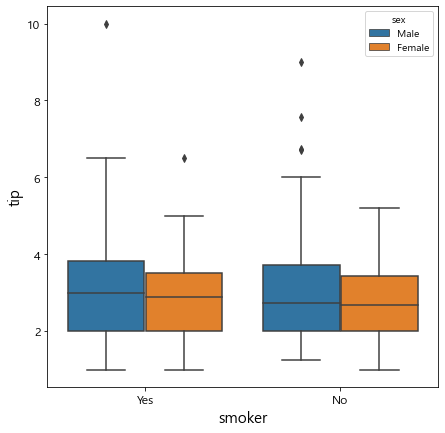

In [18]:
# 흡연 + 성별 tip 분포를 boxplot
plt.figure(figsize=(7,7))
sns.boxplot(y='tip', x='smoker', hue='sex', data=tips)
plt.show()

### violinplot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

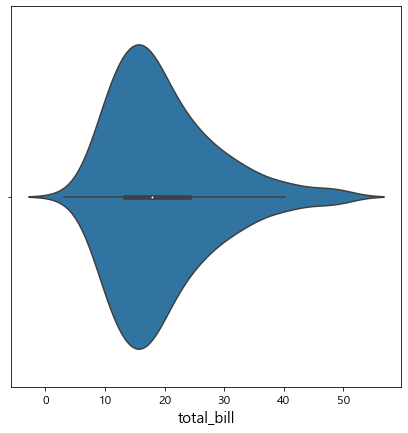

In [19]:
plt.figure(figsize=(7,7))
# sns.violinplot(y='total_bill', data=tips)
sns.violinplot(x='total_bill', data=tips)
plt.show()

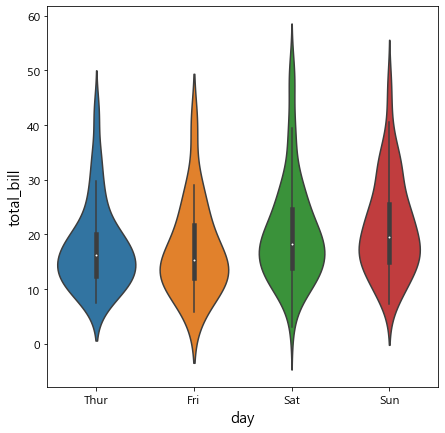

In [20]:
# 요일(data) 별 분포
plt.figure(figsize=(7,7))
sns.violinplot(y='total_bill', x='day', data=tips)
plt.show()

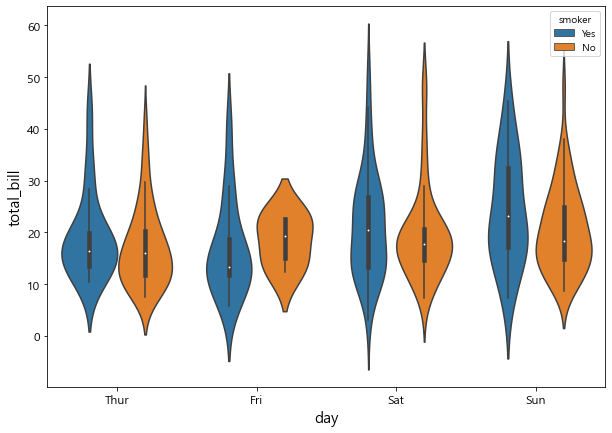

In [21]:
# 요일, 흡연 별 분포
plt.figure(figsize=(10,7))
sns.violinplot(y='total_bill', x='day', hue='smoker', data=tips)
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

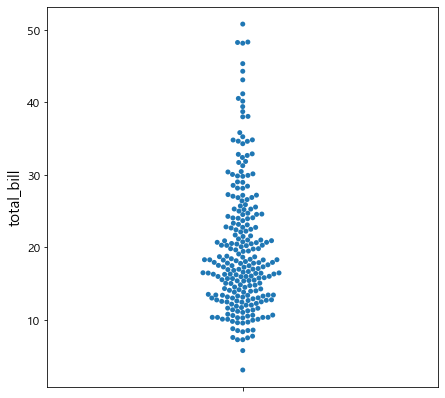

In [22]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', data=tips)
plt.show()

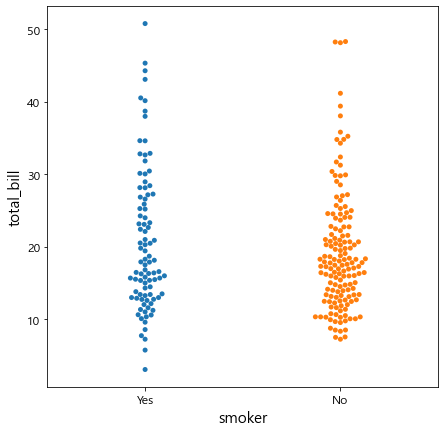

In [23]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', x='smoker',  data=tips)
plt.show()

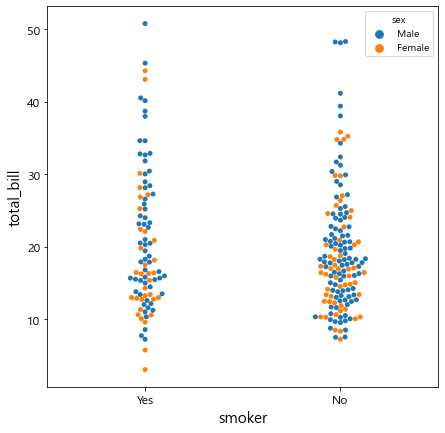

In [24]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', x='smoker', hue='sex', data=tips)
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

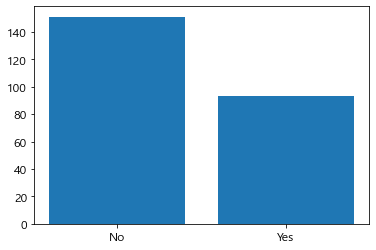

In [25]:
# matplotlib
# 개수를 세는 작업을 한뒤에 그결과로 시각화
vc = tips['smoker'].value_counts()
plt.bar(vc.index, vc)
plt.show()

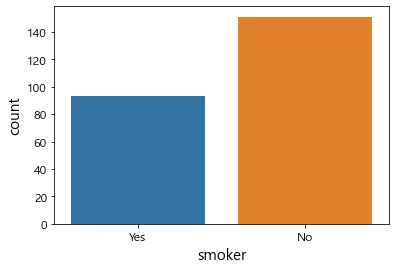

In [26]:
sns.countplot(x='smoker', data=tips)  # 범주형 컬럼을 x에 전달: 범주값별로 개수를 세서 막대그래프를 그린다.
plt.show()

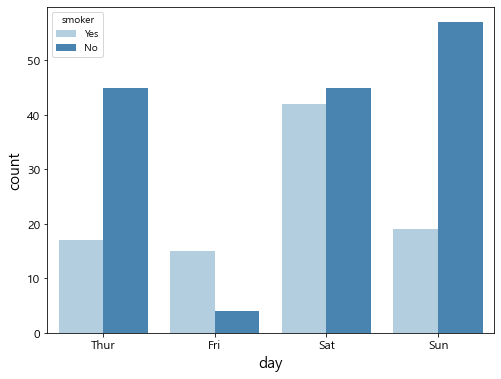

In [27]:
# 요일별 흡연자/비흡연자 수
plt.figure(figsize=(8,6))
sns.countplot(x='day', hue='smoker', data=tips, palette='Blues')
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

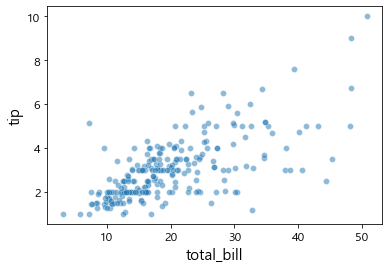

In [28]:
# total_bill과 tip 관계
sns.scatterplot(x='total_bill', y='tip', data=tips, alpha=0.5)
plt.show()

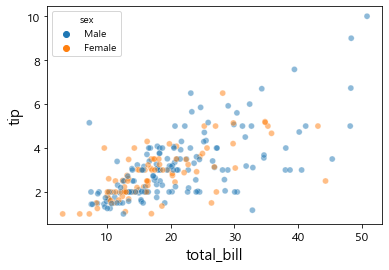

In [29]:
# total_bill과 tip 관계 성별로 나눠서
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips, alpha=0.5)
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.
> 선형회귀 적합선: 상관관계를 가장 잘 표현할 수 있는 선을 같이 그려준다.

<Figure size 504x504 with 0 Axes>

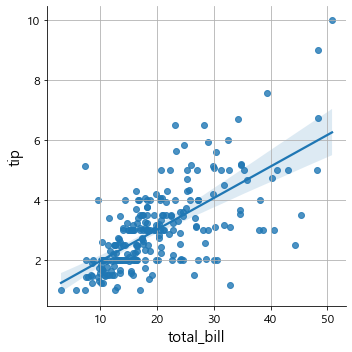

In [30]:
plt.figure(figsize=(7,7))
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.grid(True)
plt.show()

<Figure size 504x504 with 0 Axes>

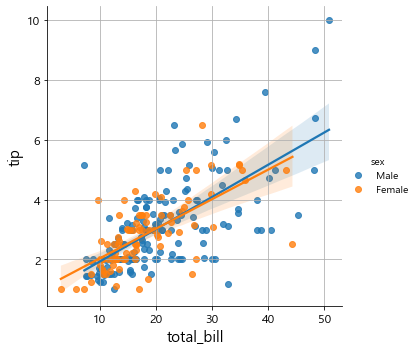

In [31]:
plt.figure(figsize=(7,7))
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.grid(True)
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
    - 컬럼명과 DataFrame을 따로 설정

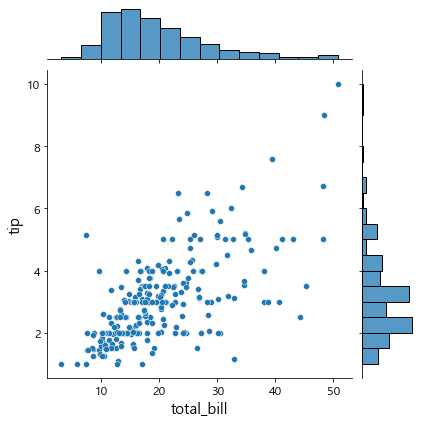

In [32]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

<Figure size 1080x1080 with 0 Axes>

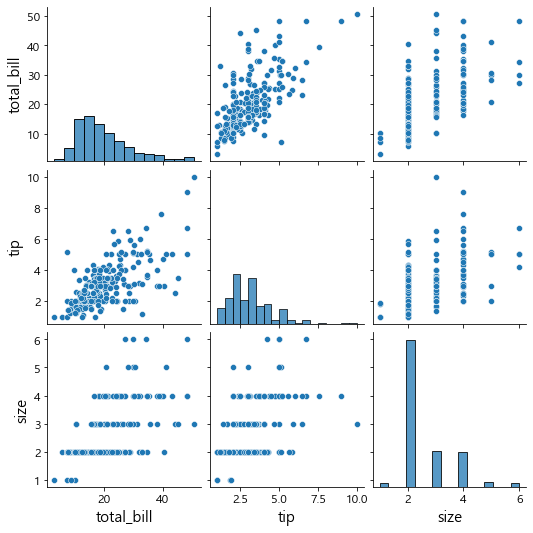

In [33]:
plt.figure(figsize=(15,15))
sns.pairplot(tips) #매개변수: dataframe, 수치형 컬럼들만 이용해서 그린다.
plt.show()

### heatmap
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [34]:
# 'total_bill', 'tip', 'size' 컬럼간의 상관계수
corr_df = tips[['total_bill', 'tip', 'size']].corr()
corr_df

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


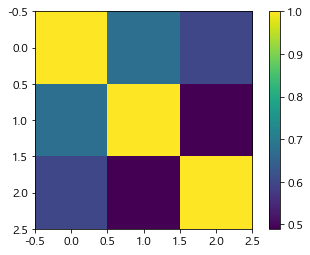

In [35]:
# matplotlib - imshow() im:image -> pixcel값(정수)을 rendering(이미지화)
plt.imshow(corr_df)
plt.colorbar()
plt.show()

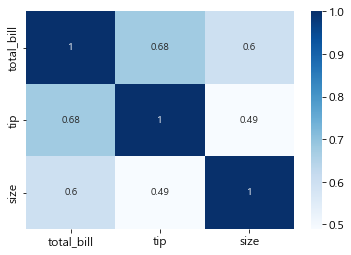

In [38]:
# seaborn: heatmap()
sns.heatmap(corr_df, annot=True, cmap='Blues')  # annot: 상관계수 표시
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [39]:
web_df = pd.read_excel('data/webbrowser_share.xls', converters={'date':np.str})
web_df.set_index('date', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15128\3707676854.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  web_df = pd.read_excel('data/webbrowser_share.xls', converters={'date':np.str})


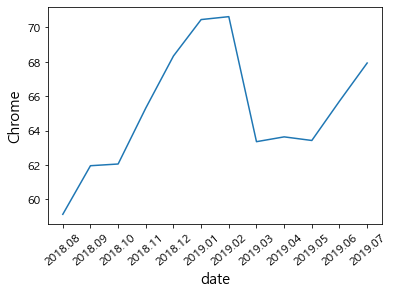

In [40]:
# sns.lineplot(x=시간컬럼, y=변화값컬럼)
# x에 dataframe의 index를 사용해야하는 경우 => 따로 조회해서 넣어준다.
# plt.figure(figsize=(15,6))
sns.lineplot(x=web_df.index, y='Chrome', data=web_df)
plt.xticks(rotation=40) # tick 라벨을 40도 돌려라
plt.show()

#### 한번에 여러개의 그래프를 그릴경우에는 Pandas가 더 편하다

In [41]:
df2 = web_df[web_df.columns[:4]]  
df2 # 데이터프레임

,Chrome,IE,Edge,Safari
date,,,,
2018.08,59.12,31.06,2.97,2.52
2018.09,61.95,27.84,3.16,2.19
2018.10,62.05,28.36,3.35,2.43
2018.11,65.31,26.29,3.06,2.09
2018.12,68.34,22.31,2.99,2.02
2019.01,70.46,21.05,2.99,2.07
2019.02,70.63,20.71,2.68,2.53
2019.03,63.35,25.42,3.81,3.16
2019.04,63.63,24.65,4.08,3.11


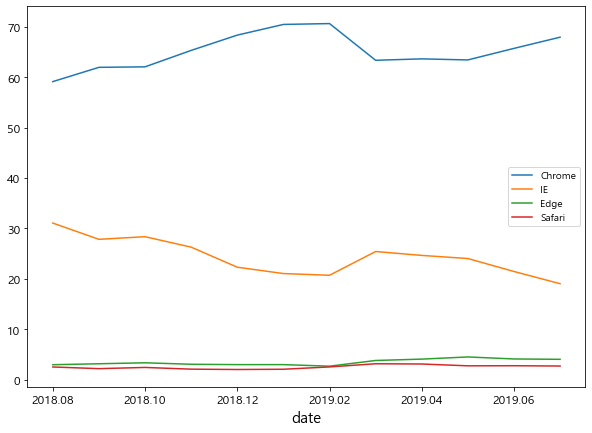

In [42]:
df2.plot(kind='line', figsize=(10,7))
plt.show()

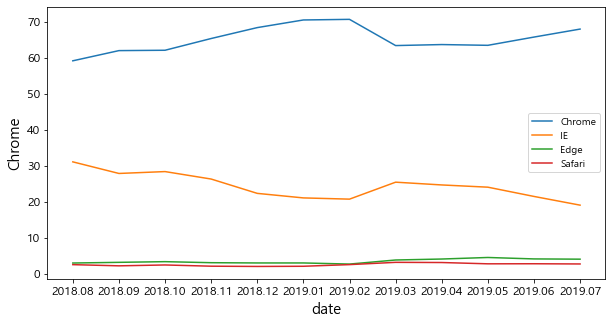

In [44]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df2.index, y='Chrome', data=df2, label='Chrome')
sns.lineplot(x=df2.index, y='IE', data=df2, label='IE')
sns.lineplot(x=df2.index, y='Edge', data=df2, label='Edge')
sns.lineplot(x=df2.index, y='Safari', data=df2, label='Safari')
plt.show()